# Exploratory Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'E:\my-projs\wall-street-sentiments\data\train_test_data\train_test_data_2023-07-21T18-43-36.csv')

In [11]:
df.columns

Index(['timestamp', 'rank', 'ticker', 'name', 'mentions', 'mentioning_users',
       'upvotes', 'sentiment', 'rank_24h_ago', 'mentions_24h_ago', 'beta',
       'earnings_per_share_ttm', 'price_to_equity_ttm', 'return_on_equity_ttm',
       'dividend_yield_annual', 'total_debt_to_equity_quarterly',
       'revenue_growth_ttm_yoy', 'dividend_exists',
       'rank_percentage_change_24h', 'mentions_percentage_change_24h',
       'opening_price', 'closing_price', 'label'],
      dtype='object')

In [12]:
df.drop(['name', ], axis=1, inplace=True)

In [13]:
data_for_univariate_analysis = df[['ticker', 'mentions', 'mentioning_users',
                                   'upvotes', 'sentiment', 'rank_24h_ago', 'mentions_24h_ago', 'beta',
                                   'earnings_per_share_ttm', 'price_to_equity_ttm', 'return_on_equity_ttm',
                                   'dividend_yield_annual', 'total_debt_to_equity_quarterly',
                                   'revenue_growth_ttm_yoy', 'dividend_exists',
                                   'rank_percentage_change_24h', 'mentions_percentage_change_24h',
                                   'opening_price', 'closing_price', 'label']]

## Null value counts

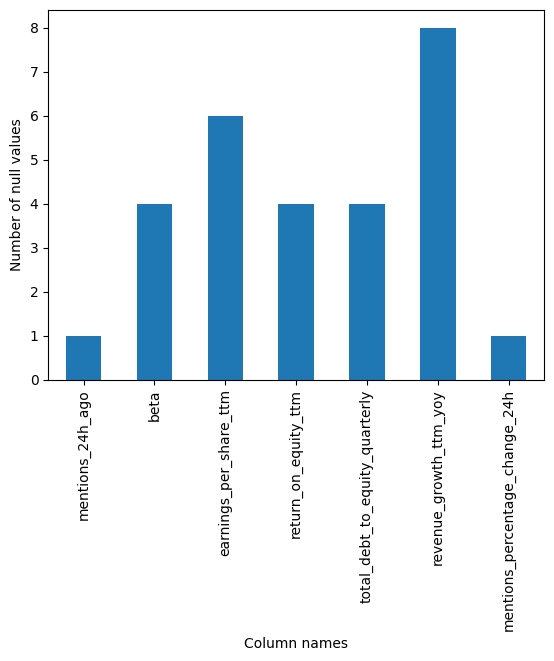

In [14]:
df.isnull().sum()
df.isnull().sum()[df.isnull().sum() > 0].plot(kind='bar')
plt.ylabel('Number of null values')
plt.xlabel('Column names')
plt.show()

## Univariate Analysis

### Initial distribution of all (continuous) columns

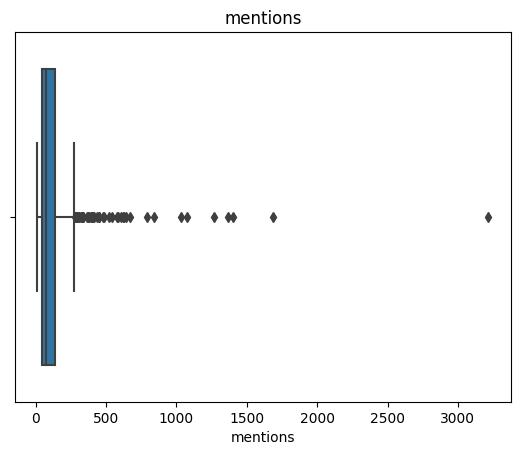

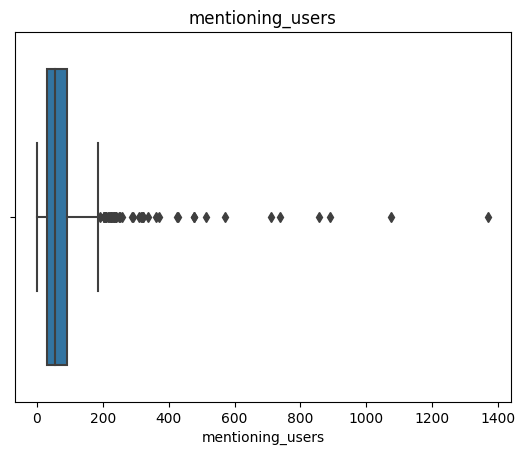

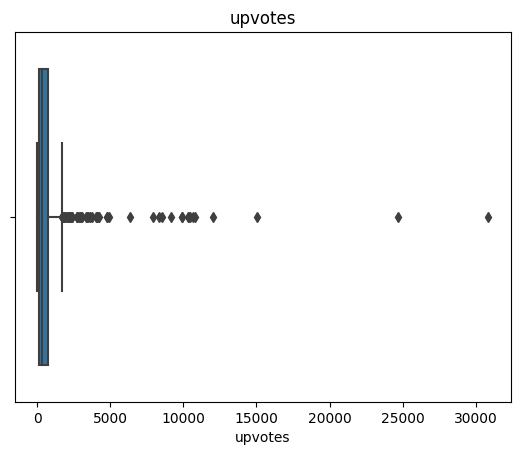

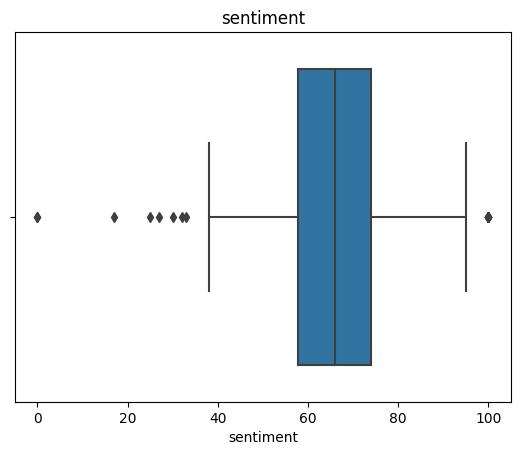

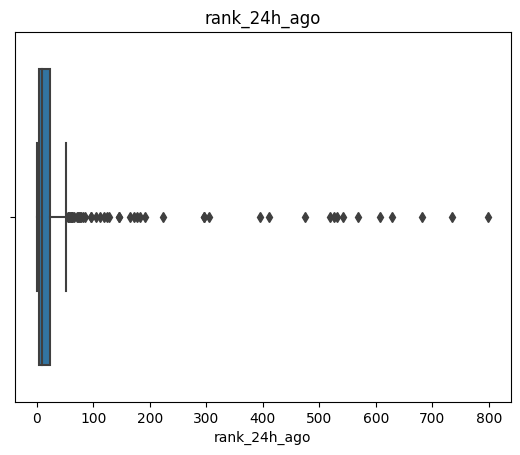

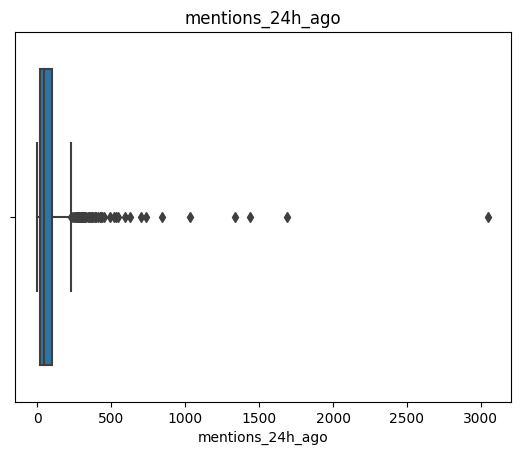

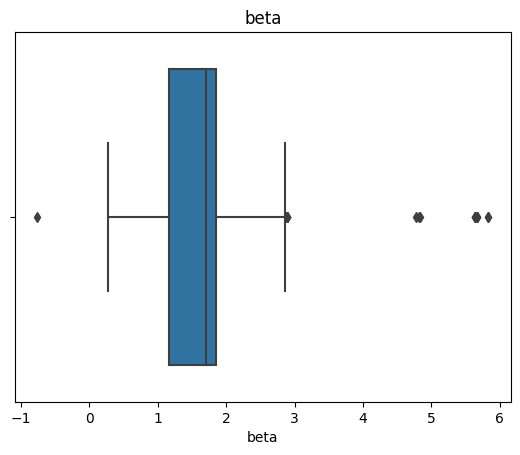

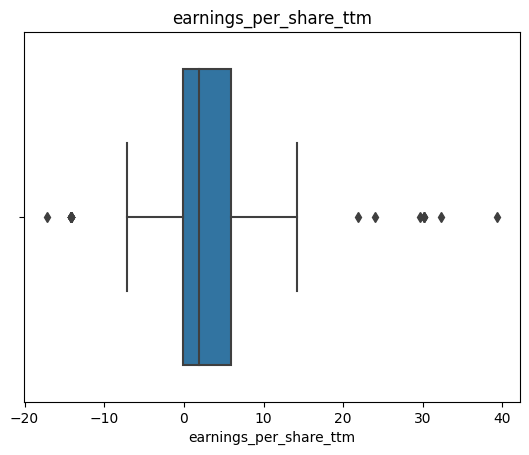

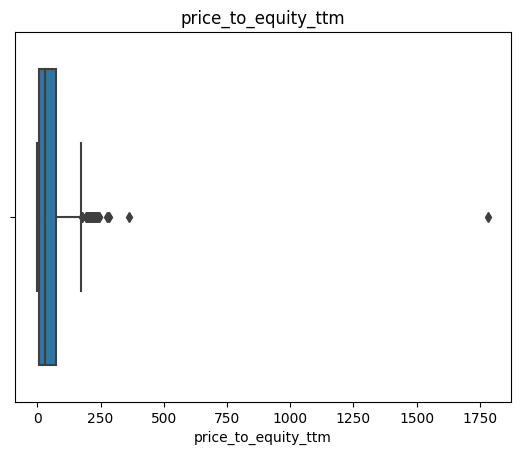

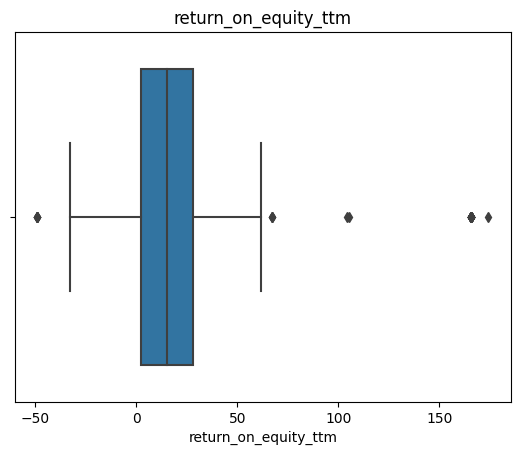

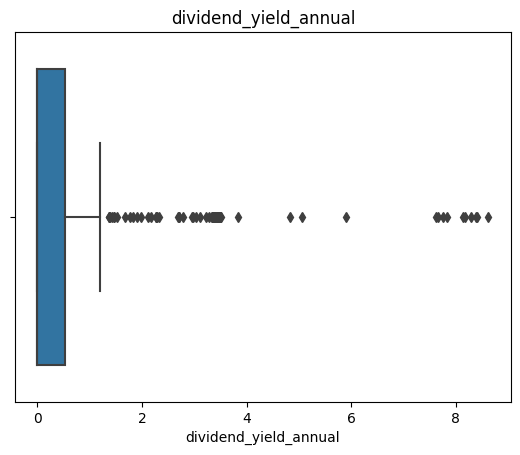

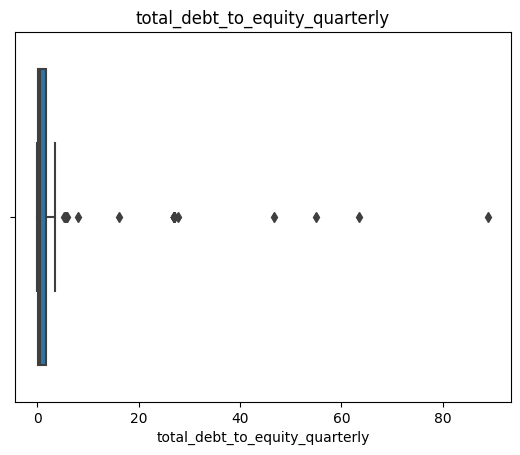

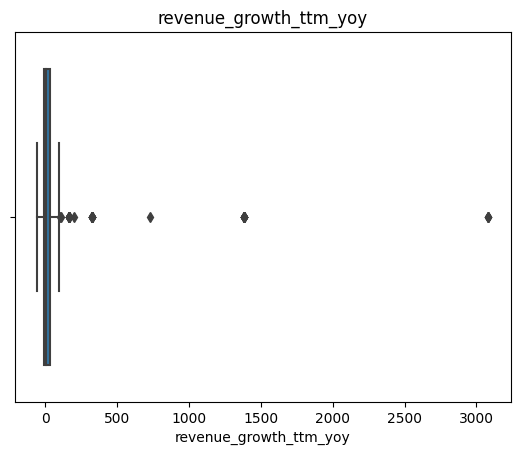

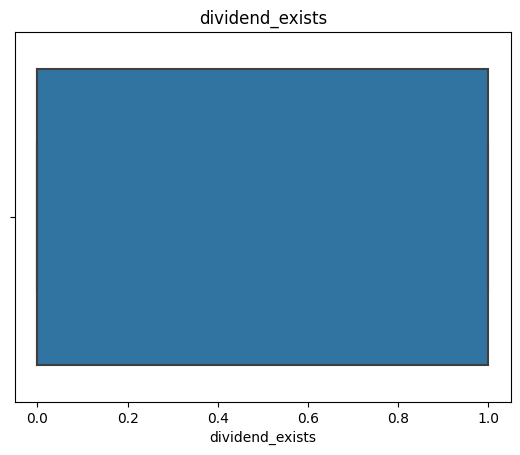

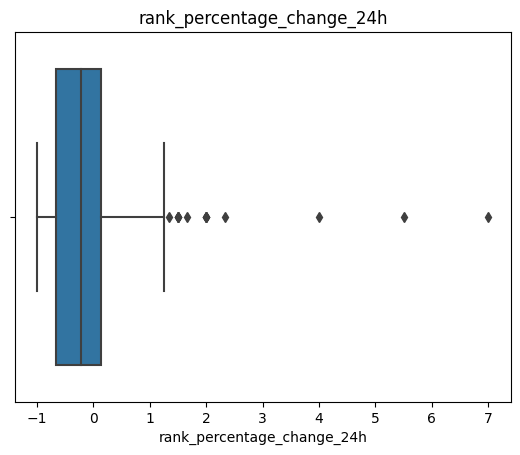

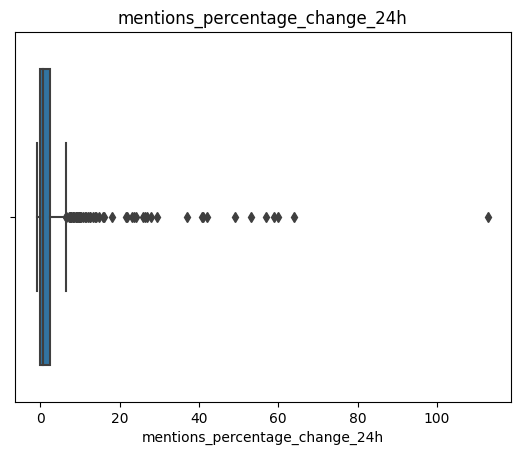

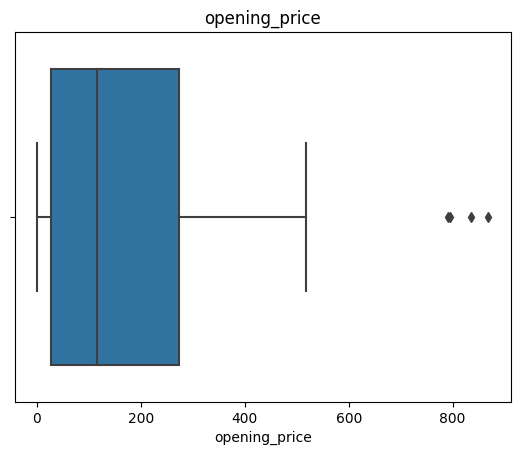

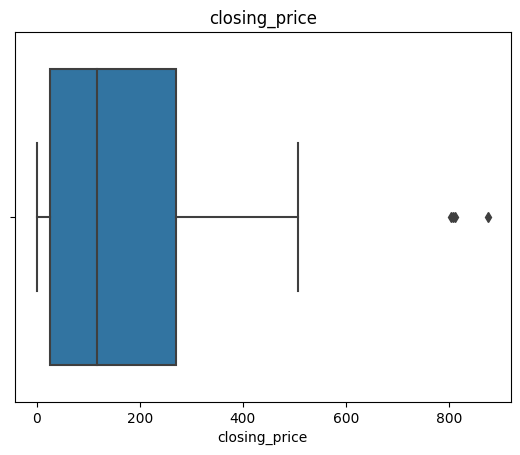

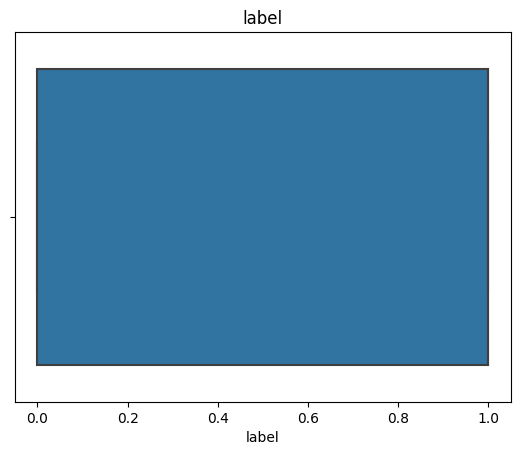

In [29]:
for col in data_for_univariate_analysis.columns:

    if df[col].dtype != 'object':
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

### Outliers Removed Analysis

<Axes: xlabel='mentions'>

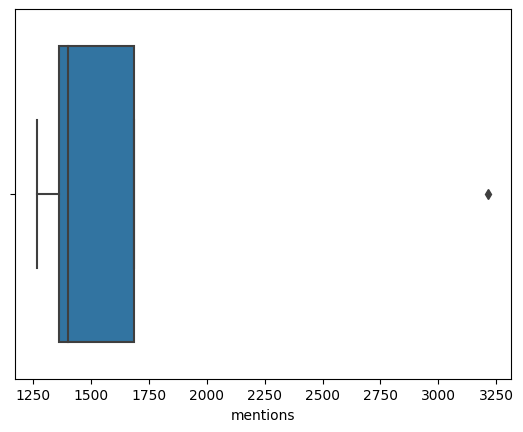

In [27]:
sns.boxplot(x=df[df['mentions'] > df['mentions'].quantile(0.99) ]['mentions'])

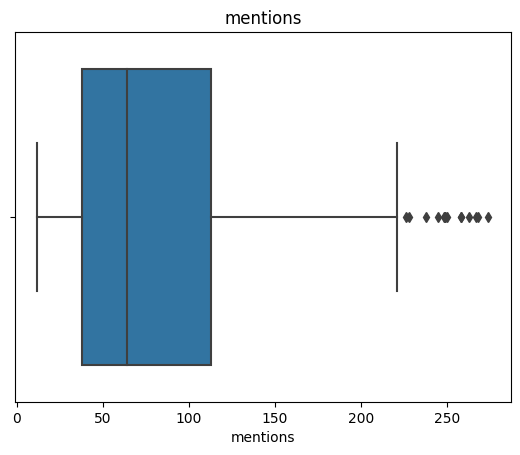

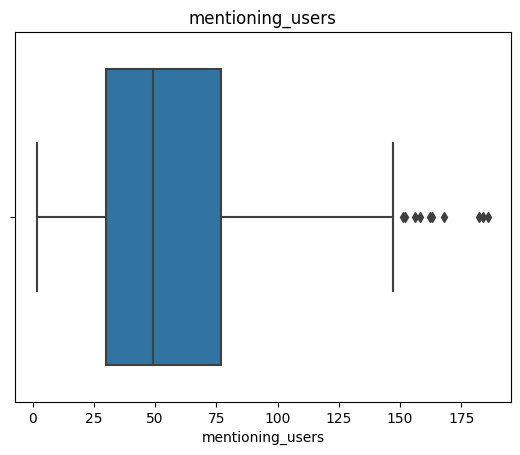

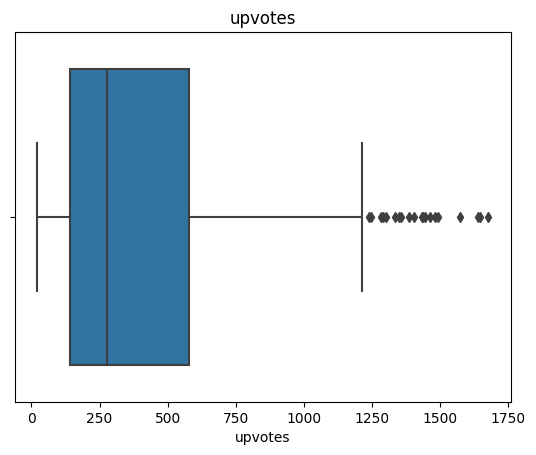

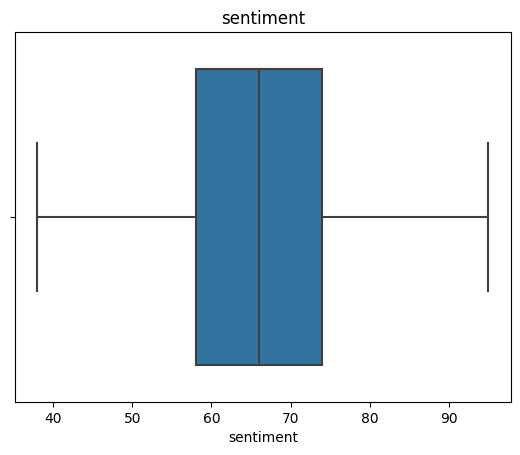

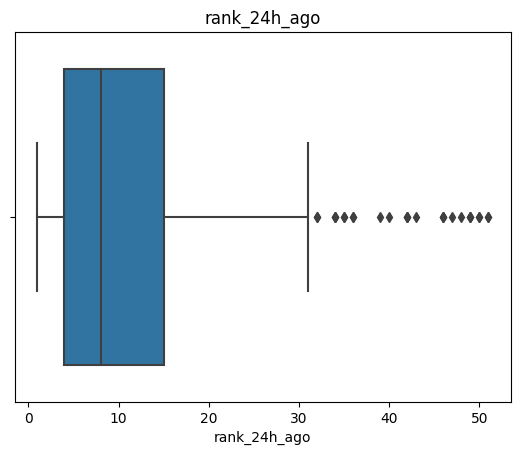

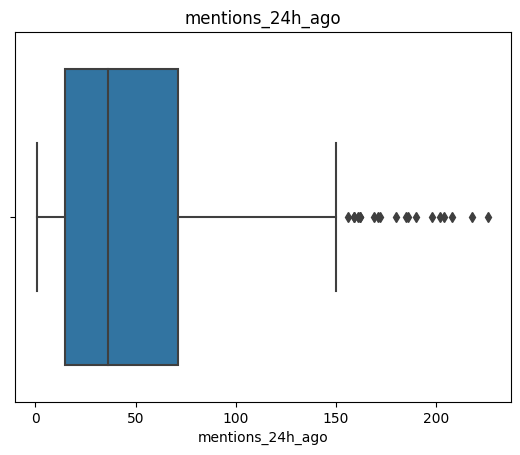

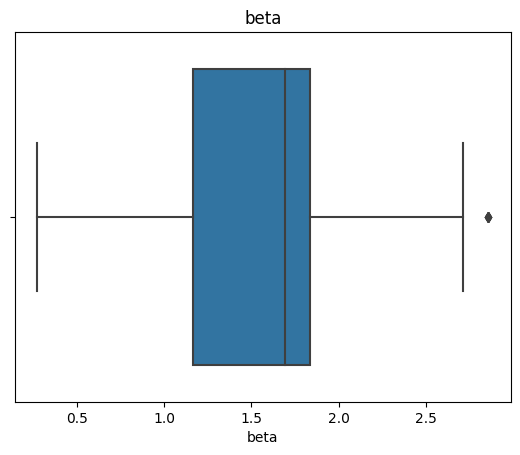

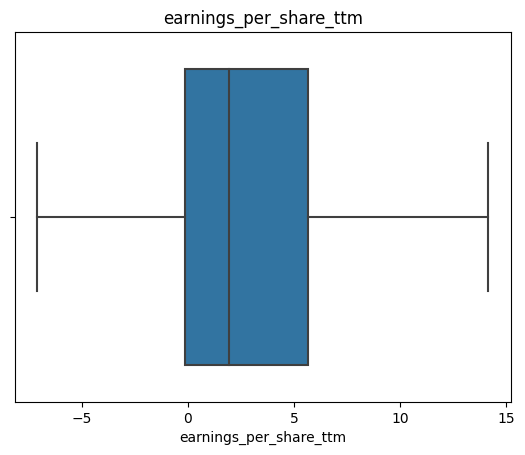

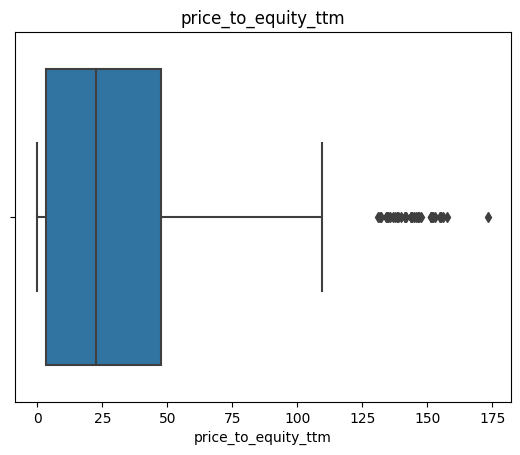

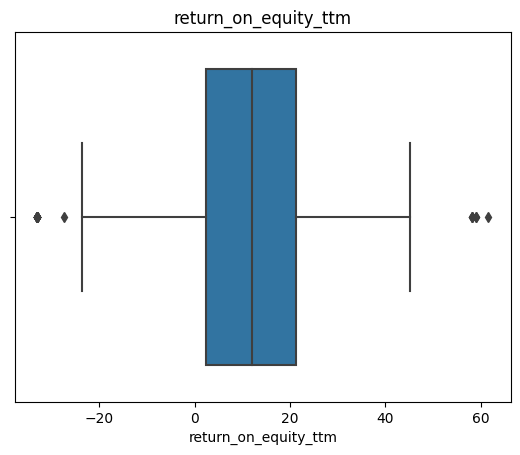

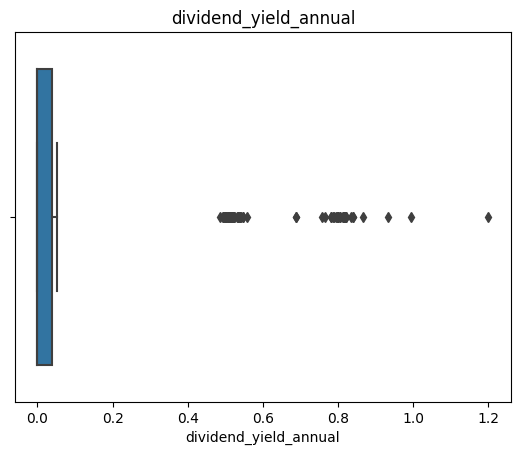

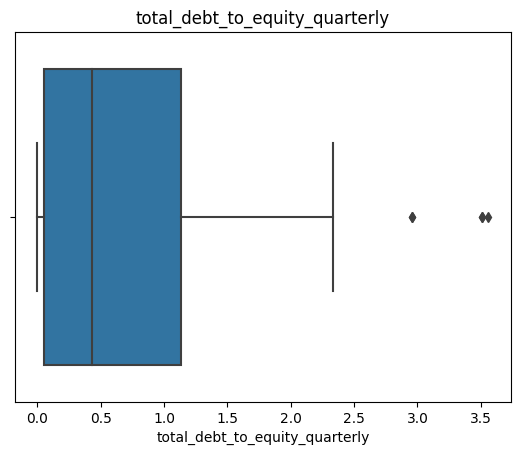

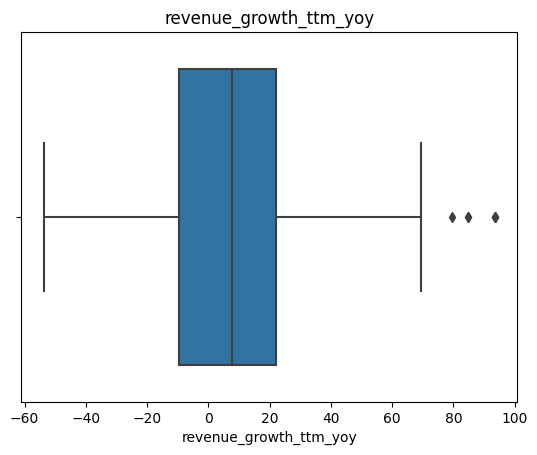

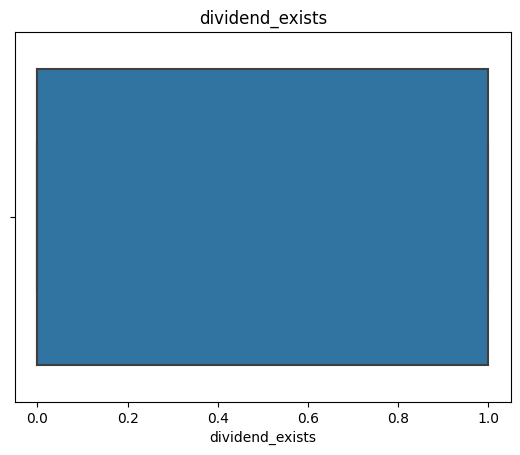

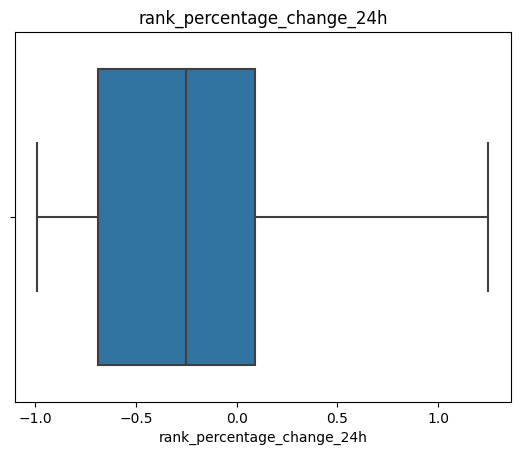

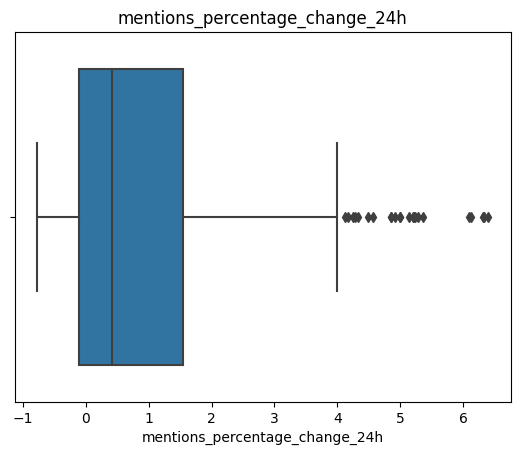

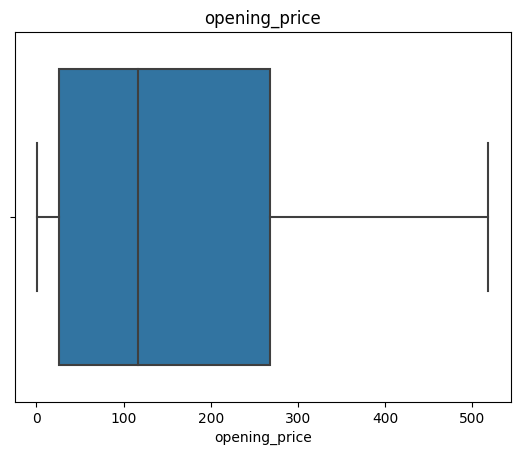

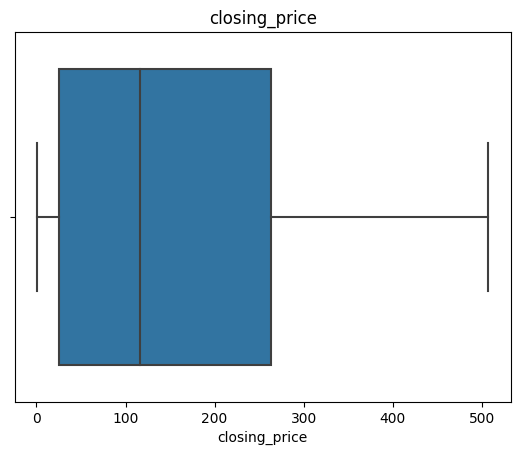

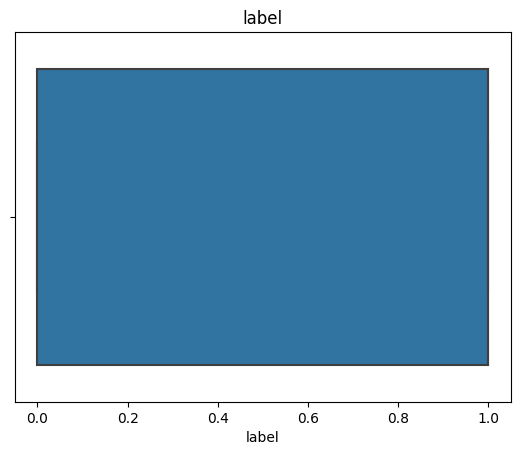

In [30]:
for col in data_for_univariate_analysis.columns:

    # Remove outliers
    try:
        if df[col].dtype != 'object':

            upper_quantile = df[col].quantile(0.75)
            lower_quantile = df[col].quantile(0.25)
            inter_quantile_range = upper_quantile - lower_quantile

            sns.boxplot(x=df[(df[col] >= (lower_quantile - 1.5 * inter_quantile_range)) &
                             (df[col] <= (upper_quantile + 1.5 * inter_quantile_range))][col])
            plt.title(col)
            plt.show()
    except Exception as e:
        print(f"Skipping {col} due to {e}")

### Specific columns

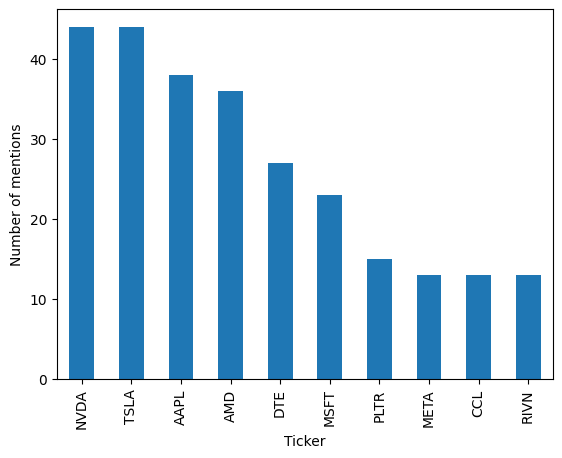

In [6]:
# Top 10 ticker counts

df['ticker'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Number of mentions')
plt.xlabel('Ticker')
plt.show()

## Bivariate Analysis

In [33]:
# Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(data_for_univariate_analysis.drop(columns=['tickers'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

KeyError: "['tickers'] not found in axis"

<Figure size 2000x2000 with 0 Axes>